In [40]:
%load_ext autoreload
%autoreload 2

In [1]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [2]:
trial_idx=5
paper='2004.04168'

# Code-generation prompts

In [3]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [4]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [5]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

I need to analyze
I need to analyze the given Hamiltonian equation and identify its components to construct the `HartreeFockHamiltonian` class.

First, let's identify the key elements of the Hamiltonian:

$E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$
$\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$, where $E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$
$H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$
$H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$
$U(k) = \sum_{n} U(n) e^{-i k \cdot n}$

The lattice is triangular.

Let's answer the questions sequentially:

### QUESTION 1: Dimension and Basis Order

Looking at the Hamiltonian, I notice the creation and annihilation operators have the form $c^\dagger_s(k)$ and $c_s(k)$. Here, $s$ represents

In [6]:
print(generated_code['thinking'])

I need to analyze the given Hamiltonian equation and identify its components to construct the `HartreeFockHamiltonian` class.

First, let's identify the key elements of the Hamiltonian:

$E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$
$\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$, where $E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$
$H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$
$H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$
$U(k) = \sum_{n} U(n) e^{-i k \cdot n}$

The lattice is triangular.

Let's answer the questions sequentially:

### QUESTION 1: Dimension and Basis Order

Looking at the Hamiltonian, I notice the creation and annihilation operators have the form $c^\dagger_s(k)$ and $c_s(k)$. Here, $s$ represents a flavor index (likely spin) and $k$ represents the momentum. 

The on

In [7]:
print(generated_code['text'])

# ANSWER:

1) Tuple of Flavors (D) = (2,)
Basis Order:
0: spin. Order: up, down

2) EXP-VAL DEPENDENT TERMS: {
    r"\langle c_s^\dagger(k_1) c_s(k_1) \rangle": "Mean of `exp_val[s, s, :]`",
    r"\langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle": "Mean of `exp_val[s, s', :]`"
}

TERMS:
- $E_s(k) c^\dagger_s(k) c_s(k)$ -> H[s, s, k], NI
- $U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$ -> H[s', s', k2], I
- $-U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$ -> H[s', s, k2], I

3) CODE:
```python
import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a triangular lattice with nearest and next-nearest neighbor hopping,
    on-site and nearest-neighbor interactions.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): F

In [8]:
code = utils_auto.extract_code(generated_code['text'])

In [9]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a triangular lattice with nearest and next-nearest neighbor hopping,
    on-site and nearest-neighbor interactions.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor for the system, default is 0.5.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={'t1': 6.0, 't2': 1.0, 'U0': 1.0, 'U1': 0.5, 'T': 0.0, 'a': 1.0}, filling_factor: float=0.5):
        self.lattice = 'triangular'
        self.D = (2,)  # 2 spin states (up, down)
        self.basis_order = {'0': 'spin'}
        # Order for spin: 0=up, 1=down
        
        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = parameters.get('T', 0.0)  # temperature, default to 0
        self.a = parameters.get('a', 1

In [10]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2004_04168_5.py


# Code evaluation

In [11]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [12]:
import importlib

In [13]:
module = importlib.import_module(code_path)

In [14]:
import HF

## Task 1: Check k-space

In [15]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

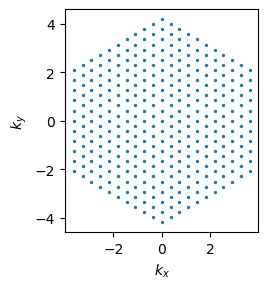

In [16]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [17]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

In [18]:
h_nonint = ham.generate_non_interacting()

In [19]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

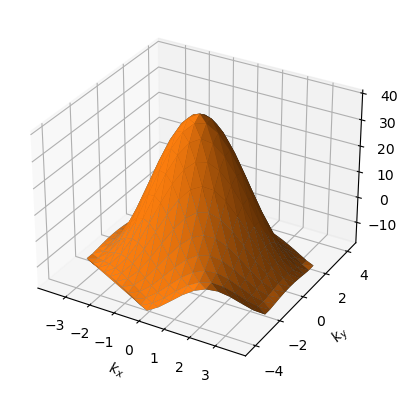

In [20]:
utils_auto.plot_2d_bandstructure(ham,en)

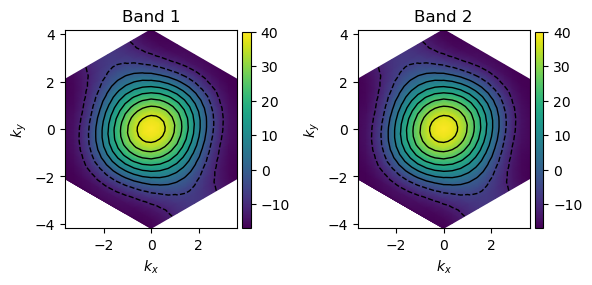

In [21]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [22]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, parameters={'U_0': 1e-5},filling_factor=0.5)

In [23]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,0.5,0)

In [24]:
wf_int, en_int, exp_val= HF.solve(ham_int,1e-10*exp_val,100)

Convergence reached at iteration 1


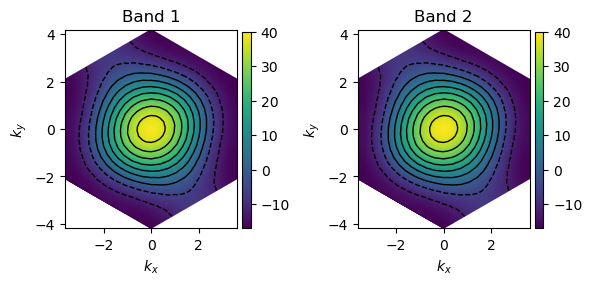

In [25]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [26]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, parameters={'U_0': 1e5},filling_factor=0.5)

In [27]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [28]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 1


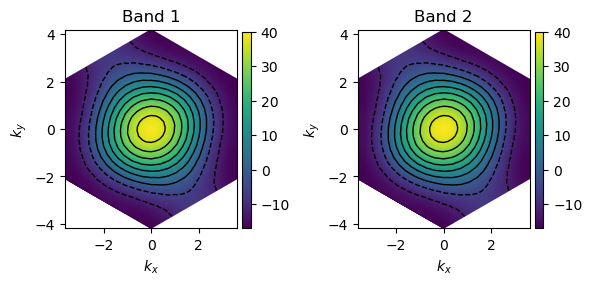

In [29]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [30]:
utils_auto.print_gap(ham_int,exp_val,en_int)

Gap is -57.03
U/T is 0.00
mean_U is 0.00


# Auto eval

## Task 1

In [31]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let's analyze the
Let's analyze the image and the problem based on the given rubric.

The rubric asks us to check:
1. If the image shows a momentum space mesh in the first Brillouin zone for the given problem
2. Check the point group symmetry

First, I need to understand what the image shows:

The image displays a 2D plot with dots arranged in a hexagonal pattern. The x-axis is labeled as k_x and ranges from approximately -3 to 3. The y-axis is labeled as k_y and also ranges from approximately -4 to 4. The dots are evenly spaced and form a hexagonal shape.

Now, let's analyze the problem:

The problem describes a Hamiltonian for a triangular lattice. For a triangular lattice, the first Brillouin zone is a hexagon in reciprocal space. This is because the real-space triangular lattice has a hexagonal symmetry, and the reciprocal lattice of a triangular lattice is also triangular, with a hexagonal Brillouin zone.

Let's check each point

In [32]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [33]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

I
I'm being asked to analyze the band structure plots shown in the image based on the given Hamiltonian and rubric. Let me work through this systematically.

First, let me understand what's shown in the image:
- There are two panels labeled "Band 1" and "Band 2"
- Both show false color plots with contour lines of what appears to be energy in the first Brillouin zone
- The x-axis is labeled k_x and the y-axis is labeled k_y
- The color scale ranges from approximately -15 (purple) to 40 (yellow)
- The Brillouin zone appears to have a hexagonal shape

Let me now go through the rubric points:

1. Identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

The Brillouin zone boundary in the plots is hexagonal, which is correct for a triangular lattice. In reciprocal space, a triangular lattice gives rise to a hexagonal Brillouin zone. So this appears to be correct.

2. Examining the 

In [34]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [35]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0, nu=1/2)
    )


#################### THINKING ####################

Let's analyze
Let's analyze the image and evaluate it according to the rubric.

The image shows two false color plots labeled "Band 1" and "Band 2", which represent the band structure in the first Brillouin zone after a self-consistent Hartree-Fock calculation with infinitesimal interaction.

Let me go through the rubric point by point:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the image, I can see that the Brillouin zone boundary is hexagonal in shape, which is indeed what we expect for a triangular lattice. This is correct.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
The highest energy regions (yellow) appear to be at the center of both Band 1 and Band 2 plots, around k_x = 0, k_y = 0.

2.2 Trace the pattern of energy variation across the zone

In [36]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [37]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,nu=1/2,U_int=1e5)
    )


#################### THINKING ####################

Let
Let me analyze the image showing the false color plots for the band structure in the first Brillouin zone after a self-consistent Hartree-Fock calculation with a large interaction limit. I'll follow the rubric to evaluate it step by step.

1. Identify the shape of the Brillouin zone boundary:
   - The boundary appears to be hexagonal in shape (with six sides), which is indeed the expected Brillouin zone for a triangular lattice. This matches what's expected.

2. Examine the symmetry of the energy distribution shown by the false color plot:

   2.1 Identify the highest energy regions (yellow):
   - The highest energy region (yellow) in both Band 1 and Band 2 is at the center of the Brillouin zone (around k_x = 0, k_y = 0).

   2.2 Trace the pattern of energy variation across the zone:
   - The energy decreases radially outward from the center in concentric circular patterns. The color transitions from yellow at the center to green

In [38]:
answer4=utils_auto.extract_result_content(result4['text'])

In [39]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '5' saved to final_answer.yaml
